In [1]:
import dask

import pandas as pd

import xarray as xr
import numpy as np

import pandas as pd
import dask.array as da



import warnings
warnings.filterwarnings('ignore')
from datetime import date



import math

#plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
#sns.set_theme(style="white")

print('loaded libraries')

loaded libraries


In [2]:
dir_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/"
mt_path = "/pub/mariant3/WarmWaterMasses/02_tracking-mhws/"
manso = pd.read_pickle(f"{mt_path}/01860503-01901020_mhw-metrics-region.pkl")
globe = pd.read_pickle(f"{mt_path}/01860503-01901020_mhw-metrics-global.pkl")

In [3]:
blobs = xr.open_dataset("/pub/mariant3/WarmWaterMasses/02_tracking-mhws/01860503-01901020_ocetrac-labels-region.nc")

In [4]:
labels = blobs.blobs

In [5]:
manso

,id,date,coords,centroid,duration,intensity_max,intensity_mean,intensity_min,intensity_cumulative,area
0,3,"[0186-05-09, 0186-05-10, 0186-05-11, 0186-05-1...","[([10.687478569214495, 10.687478569214495, 10....",NaN,16,"[30.577562, 30.524511, 30.282787, 29.90784, 29...","[29.438, 29.407696, 29.413874, 29.361107, 29.3...","[28.607817, 28.37463, 28.442465, 28.612474, 28...",5.406714e+05,"[380071300000.0, 696309600000.0, 792937000000...."
1,6,"[0186-05-30, 0186-05-31, 0186-06-01, 0186-06-0...","[([10.933041787532273, 10.933041787532273, 10....",NaN,13,"[30.057089, 30.454035, 30.46838, 30.451525, 30...","[29.311945, 29.442247, 29.538956, 29.57242, 29...","[28.448698, 28.309492, 28.496428, 28.540184, 2...",3.501574e+05,"[340643500000.0, 483869520000.0, 622780100000...."
2,22,[0186-07-20],"[([18.66104935115552, 18.66104935115552, 18.66...",NaN,1,[31.270472],[29.813925],[27.587831],1.302869e+04,[285375530000.0]
3,25,"[0186-07-26, 0186-07-27, 0186-07-28, 0186-07-2...","[([25.82802282930681, 25.82802282930681, 25.82...",NaN,29,"[31.408276, 31.437366, 31.503633, 31.628426, 3...","[29.645166, 29.672773, 29.730291, 29.838388, 2...","[28.889091, 28.83733, 28.804953, 28.842989, 28...",1.188258e+06,"[287833980000.0, 352467260000.0, 351324600000...."
4,26,"[0186-08-03, 0186-08-04, 0186-08-05, 0186-08-0...","[([20.54502229317784, 20.54502229317784, 20.54...",NaN,32,"[31.636108, 31.620401, 31.84838, 32.26465, 32....","[29.981346, 29.97524, 30.070566, 30.144043, 30...","[27.698223, 27.66954, 27.685774, 27.989813, 27...",8.970981e+05,"[298516220000.0, 322080870000.0, 325828940000...."
...,...,...,...,...,...,...,...,...,...,...
81,246,"[0190-09-13, 0190-09-14, 0190-09-15, 0190-09-1...","[([12.157724627851596, 12.157724627851596, 12....",NaN,19,"[31.27847, 31.299314, 31.333862, 31.43928, 31....","[29.403198, 29.40525, 29.461935, 29.54514, 29....","[27.143654, 27.311272, 27.46038, 27.484646, 27...",4.001723e+05,"[741692900000.0, 847470800000.0, 692456100000...."
82,247,"[0190-09-16, 0190-09-17, 0190-09-18, 0190-09-19]","[([20.07611149317811, 20.07611149317811, 20.07...",NaN,4,"[31.091232, 31.278599, 31.359415, 31.240648]","[29.328428, 29.45112, 29.471848, 29.478056]","[28.450603, 28.732035, 28.68586, 28.569616]",5.174078e+04,"[292100300000.0, 307790000000.0, 302742240000...."
83,249,[0190-09-20],"[([11.178401873711781, 11.178401873711781, 11....",NaN,1,[30.114367],[29.211132],[28.488102],1.592007e+04,[397676450000.0]
84,252,[0190-09-27],"[([18.186678776990284, 18.186678776990284, 18....",NaN,1,[31.19624],[29.413017],[28.652298],1.352999e+04,[312604160000.0]


In [6]:
globe

,id,date,coords,centroid,duration,intensity_max,intensity_mean,intensity_min,intensity_cumulative,area
0,1,"[0186-05-03, 0186-05-04, 0186-05-05, 0186-05-0...","[([-9.21007812156814, -9.21007812156814, -9.21...",NaN,34,"[32.887207, 33.00415, 33.063168, 33.15836, 33....","[29.608562, 29.658926, 29.67992, 29.765705, 29...","[26.511286, 26.664972, 26.85391, 27.001102, 26...",1.446968e+07,"[14270538000000.0, 13362650000000.0, 140240920..."
1,2,[0186-05-03],"[([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24999920672...",NaN,1,[29.845846],[29.128826],[28.306025],1.441877e+04,[382360940000.0]
2,3,"[0186-05-09, 0186-05-10, 0186-05-11, 0186-05-1...","[([10.687478569214495, 10.687478569214495, 10....",NaN,16,"[30.577562, 30.524511, 30.282787, 29.90784, 29...","[29.438, 29.407696, 29.413874, 29.358849, 29.3...","[28.607817, 28.37463, 28.442465, 28.612474, 28...",5.607258e+05,"[380071300000.0, 696309500000.0, 792936900000...."
3,4,[0186-05-27],"[([3.9967547010414073, 3.9967547010414073, 3.9...",NaN,1,[29.367353],[29.140228],[28.749264],1.331708e+04,[350532700000.0]
4,5,"[0186-05-30, 0186-05-31, 0186-06-01]","[([10.687478569214495, 10.687478569214495, 10....",NaN,3,"[30.352192, 30.683998, 30.869896]","[29.494673, 29.538881, 29.602905]","[28.488447, 28.519936, 28.575197]",4.062350e+04,"[348537360000.0, 335577350000.0, 327681900000.0]"
...,...,...,...,...,...,...,...,...,...,...
251,252,[0190-09-27],"[([18.186678776990284, 18.186678776990284, 18....",NaN,1,[31.19624],[29.413017],[28.652298],1.352999e+04,[312604160000.0]
252,253,[0190-10-04],"[([14.105322883430246, 14.105322883430246, 14....",NaN,1,[31.830257],[30.215403],[28.927935],1.320413e+04,[303718400000.0]
253,254,"[0190-10-05, 0190-10-06, 0190-10-07, 0190-10-0...","[([-6.237641830626559, -6.237641830626559, -6....",NaN,11,"[30.922161, 31.141644, 31.267267, 31.339643, 3...","[29.431765, 29.515785, 29.55941, 29.607147, 29...","[28.663006, 28.589237, 28.438332, 28.554108, 2...",1.582111e+05,"[402205840000.0, 453846500000.0, 502059100000...."
254,255,[0190-10-10],"[([9.456768240176679, 9.456768240176679, 9.456...",NaN,1,[29.469902],[29.194649],[28.976725],1.424699e+04,[360861070000.0]


In [7]:
area_list = [event_area.sum() for event_area in globe.area.values]

In [8]:
intensity_list = [(event_maxint.max()-29) for event_maxint in globe.intensity_max.values]

In [9]:
globe['max_intensity_max'] = intensity_list
globe

,id,date,coords,centroid,duration,intensity_max,intensity_mean,intensity_min,intensity_cumulative,area,max_intensity_max
0,1,"[0186-05-03, 0186-05-04, 0186-05-05, 0186-05-0...","[([-9.21007812156814, -9.21007812156814, -9.21...",NaN,34,"[32.887207, 33.00415, 33.063168, 33.15836, 33....","[29.608562, 29.658926, 29.67992, 29.765705, 29...","[26.511286, 26.664972, 26.85391, 27.001102, 26...",1.446968e+07,"[14270538000000.0, 13362650000000.0, 140240920...",4.215405
1,2,[0186-05-03],"[([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24999920672...",NaN,1,[29.845846],[29.128826],[28.306025],1.441877e+04,[382360940000.0],0.845846
2,3,"[0186-05-09, 0186-05-10, 0186-05-11, 0186-05-1...","[([10.687478569214495, 10.687478569214495, 10....",NaN,16,"[30.577562, 30.524511, 30.282787, 29.90784, 29...","[29.438, 29.407696, 29.413874, 29.358849, 29.3...","[28.607817, 28.37463, 28.442465, 28.612474, 28...",5.607258e+05,"[380071300000.0, 696309500000.0, 792936900000....",1.577562
3,4,[0186-05-27],"[([3.9967547010414073, 3.9967547010414073, 3.9...",NaN,1,[29.367353],[29.140228],[28.749264],1.331708e+04,[350532700000.0],0.367353
4,5,"[0186-05-30, 0186-05-31, 0186-06-01]","[([10.687478569214495, 10.687478569214495, 10....",NaN,3,"[30.352192, 30.683998, 30.869896]","[29.494673, 29.538881, 29.602905]","[28.488447, 28.519936, 28.575197]",4.062350e+04,"[348537360000.0, 335577350000.0, 327681900000.0]",1.869896
...,...,...,...,...,...,...,...,...,...,...,...
251,252,[0190-09-27],"[([18.186678776990284, 18.186678776990284, 18....",NaN,1,[31.19624],[29.413017],[28.652298],1.352999e+04,[312604160000.0],2.196239
252,253,[0190-10-04],"[([14.105322883430246, 14.105322883430246, 14....",NaN,1,[31.830257],[30.215403],[28.927935],1.320413e+04,[303718400000.0],2.830257
253,254,"[0190-10-05, 0190-10-06, 0190-10-07, 0190-10-0...","[([-6.237641830626559, -6.237641830626559, -6....",NaN,11,"[30.922161, 31.141644, 31.267267, 31.339643, 3...","[29.431765, 29.515785, 29.55941, 29.607147, 29...","[28.663006, 28.589237, 28.438332, 28.554108, 2...",1.582111e+05,"[402205840000.0, 453846500000.0, 502059100000....",2.347834
254,255,[0190-10-10],"[([9.456768240176679, 9.456768240176679, 9.456...",NaN,1,[29.469902],[29.194649],[28.976725],1.424699e+04,[360861070000.0],0.469902


In [10]:
globe['cumulative_area']= area_list
globe;

In [11]:
globe.coords[0][0]

(array([-9.21007812, -9.21007812, -9.21007812, ..., 18.4240276 ,
        18.4240276 , 18.4240276 ]),
 array([-201.51099981, -201.26268687, -201.01436486, ..., -244.1574819 ,
        -243.90958034, -243.66168074]))

In [12]:
globe.coords[0][0][0]

array([-9.21007812, -9.21007812, -9.21007812, ..., 18.4240276 ,
       18.4240276 , 18.4240276 ])

In [24]:
# event_coords = []
# for i in range(len(globe.coords)):
#     #print(globe.coords[i])
#     coords_per_event = []
#     for j in range(len(globe.coords[i])):
#         #print(globe.coords[i][j])
#         coords_per_event += [[np.mean(globe.coords[i][0][0]), np.mean(globe.coords[i][0][1])]] #j is the day to only get one set of indices replace j with 0 (after [i])
#     event_coords += [coords_per_event]
# event_coords;

In [32]:
event_coords_x = []
event_coords_y= []
for i in range(len(globe.coords)):
    #print(globe.coords[i])
    event_coords_y += [np.mean(globe.coords[i][0][0])] 
    event_coords_x += [np.mean(globe.coords[i][0][1])] #j is the day to only get one set of indices replace j with 0 (after [i])
event_coords_y;

In [43]:
globe

,id,date,coords,centroid,duration,intensity_max,intensity_mean,intensity_min,intensity_cumulative,area,max_intensity_max,cumulative_area,event_coords,event_coords_x,event_coords_y
0,1,"[0186-05-03, 0186-05-04, 0186-05-05, 0186-05-0...","[([-9.21007812156814, -9.21007812156814, -9.21...",NaN,34,"[32.887207, 33.00415, 33.063168, 33.15836, 33....","[29.608562, 29.658926, 29.67992, 29.765705, 29...","[26.511286, 26.664972, 26.85391, 27.001102, 26...",1.446968e+07,"[14270538000000.0, 13362650000000.0, 140240920...",4.215405,3.677411e+14,"[4.231954749027203, -212.90427210854835]",-212.904272,4.231955
1,2,[0186-05-03],"[([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24999920672...",NaN,1,[29.845846],[29.128826],[28.306025],1.441877e+04,[382360940000.0],0.845846,3.823609e+11,"[2.5860925715943006, 6.60901945722916]",6.609019,2.586093
2,3,"[0186-05-09, 0186-05-10, 0186-05-11, 0186-05-1...","[([10.687478569214495, 10.687478569214495, 10....",NaN,16,"[30.577562, 30.524511, 30.282787, 29.90784, 29...","[29.438, 29.407696, 29.413874, 29.358849, 29.3...","[28.607817, 28.37463, 28.442465, 28.612474, 28...",5.607258e+05,"[380071300000.0, 696309500000.0, 792936900000....",1.577562,1.409477e+13,"[14.11300258203648, -100.33127080412706]",-100.331271,14.113003
3,4,[0186-05-27],"[([3.9967547010414073, 3.9967547010414073, 3.9...",NaN,1,[29.367353],[29.140228],[28.749264],1.331708e+04,[350532700000.0],0.367353,3.505327e+11,"[5.587826183510956, -21.05664512829406]",-21.056645,5.587826
4,5,"[0186-05-30, 0186-05-31, 0186-06-01]","[([10.687478569214495, 10.687478569214495, 10....",NaN,3,"[30.352192, 30.683998, 30.869896]","[29.494673, 29.538881, 29.602905]","[28.488447, 28.519936, 28.575197]",4.062350e+04,"[348537360000.0, 335577350000.0, 327681900000.0]",1.869896,1.011797e+12,"[12.947409701185615, 49.149838857451506]",49.149839,12.947410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,[0190-09-27],"[([18.186678776990284, 18.186678776990284, 18....",NaN,1,[31.19624],[29.413017],[28.652298],1.352999e+04,[312604160000.0],2.196239,3.126042e+11,"[20.57128951465651, -78.32884994038155]",-78.328850,20.571290
252,253,[0190-10-04],"[([14.105322883430246, 14.105322883430246, 14....",NaN,1,[31.830257],[30.215403],[28.927935],1.320413e+04,[303718400000.0],2.830257,3.037184e+11,"[18.592884422496137, 40.05636370609727]",40.056364,18.592884
253,254,"[0190-10-05, 0190-10-06, 0190-10-07, 0190-10-0...","[([-6.237641830626559, -6.237641830626559, -6....",NaN,11,"[30.922161, 31.141644, 31.267267, 31.339643, 3...","[29.431765, 29.515785, 29.55941, 29.607147, 29...","[28.663006, 28.589237, 28.438332, 28.554108, 2...",1.582111e+05,"[402205840000.0, 453846500000.0, 502059100000....",2.347834,4.136421e+12,"[-2.127431559927107, -253.09191255228203]",-253.091913,-2.127432
254,255,[0190-10-10],"[([9.456768240176679, 9.456768240176679, 9.456...",NaN,1,[29.469902],[29.194649],[28.976725],1.424699e+04,[360861070000.0],0.469902,3.608611e+11,"[12.224364887364281, -197.9922710088315]",-197.992271,12.224365


In [35]:
event_coords_x;

In [44]:
globe['event_coords_x'] = event_coords_x
globe

,id,date,coords,centroid,duration,intensity_max,intensity_mean,intensity_min,intensity_cumulative,area,max_intensity_max,cumulative_area,event_coords,event_coords_x,event_coords_y
0,1,"[0186-05-03, 0186-05-04, 0186-05-05, 0186-05-0...","[([-9.21007812156814, -9.21007812156814, -9.21...",NaN,34,"[32.887207, 33.00415, 33.063168, 33.15836, 33....","[29.608562, 29.658926, 29.67992, 29.765705, 29...","[26.511286, 26.664972, 26.85391, 27.001102, 26...",1.446968e+07,"[14270538000000.0, 13362650000000.0, 140240920...",4.215405,3.677411e+14,"[4.231954749027203, -212.90427210854835]",-212.904272,4.231955
1,2,[0186-05-03],"[([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24999920672...",NaN,1,[29.845846],[29.128826],[28.306025],1.441877e+04,[382360940000.0],0.845846,3.823609e+11,"[2.5860925715943006, 6.60901945722916]",6.609019,2.586093
2,3,"[0186-05-09, 0186-05-10, 0186-05-11, 0186-05-1...","[([10.687478569214495, 10.687478569214495, 10....",NaN,16,"[30.577562, 30.524511, 30.282787, 29.90784, 29...","[29.438, 29.407696, 29.413874, 29.358849, 29.3...","[28.607817, 28.37463, 28.442465, 28.612474, 28...",5.607258e+05,"[380071300000.0, 696309500000.0, 792936900000....",1.577562,1.409477e+13,"[14.11300258203648, -100.33127080412706]",-100.331271,14.113003
3,4,[0186-05-27],"[([3.9967547010414073, 3.9967547010414073, 3.9...",NaN,1,[29.367353],[29.140228],[28.749264],1.331708e+04,[350532700000.0],0.367353,3.505327e+11,"[5.587826183510956, -21.05664512829406]",-21.056645,5.587826
4,5,"[0186-05-30, 0186-05-31, 0186-06-01]","[([10.687478569214495, 10.687478569214495, 10....",NaN,3,"[30.352192, 30.683998, 30.869896]","[29.494673, 29.538881, 29.602905]","[28.488447, 28.519936, 28.575197]",4.062350e+04,"[348537360000.0, 335577350000.0, 327681900000.0]",1.869896,1.011797e+12,"[12.947409701185615, 49.149838857451506]",49.149839,12.947410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,[0190-09-27],"[([18.186678776990284, 18.186678776990284, 18....",NaN,1,[31.19624],[29.413017],[28.652298],1.352999e+04,[312604160000.0],2.196239,3.126042e+11,"[20.57128951465651, -78.32884994038155]",-78.328850,20.571290
252,253,[0190-10-04],"[([14.105322883430246, 14.105322883430246, 14....",NaN,1,[31.830257],[30.215403],[28.927935],1.320413e+04,[303718400000.0],2.830257,3.037184e+11,"[18.592884422496137, 40.05636370609727]",40.056364,18.592884
253,254,"[0190-10-05, 0190-10-06, 0190-10-07, 0190-10-0...","[([-6.237641830626559, -6.237641830626559, -6....",NaN,11,"[30.922161, 31.141644, 31.267267, 31.339643, 3...","[29.431765, 29.515785, 29.55941, 29.607147, 29...","[28.663006, 28.589237, 28.438332, 28.554108, 2...",1.582111e+05,"[402205840000.0, 453846500000.0, 502059100000....",2.347834,4.136421e+12,"[-2.127431559927107, -253.09191255228203]",-253.091913,-2.127432
254,255,[0190-10-10],"[([9.456768240176679, 9.456768240176679, 9.456...",NaN,1,[29.469902],[29.194649],[28.976725],1.424699e+04,[360861070000.0],0.469902,3.608611e+11,"[12.224364887364281, -197.9922710088315]",-197.992271,12.224365


In [37]:
globe['event_coords_y'] = event_coords_y
globe

,id,date,coords,centroid,duration,intensity_max,intensity_mean,intensity_min,intensity_cumulative,area,max_intensity_max,cumulative_area,event_coords,event_coords_x,event_coords_y
0,1,"[0186-05-03, 0186-05-04, 0186-05-05, 0186-05-0...","[([-9.21007812156814, -9.21007812156814, -9.21...",NaN,34,"[32.887207, 33.00415, 33.063168, 33.15836, 33....","[29.608562, 29.658926, 29.67992, 29.765705, 29...","[26.511286, 26.664972, 26.85391, 27.001102, 26...",1.446968e+07,"[14270538000000.0, 13362650000000.0, 140240920...",4.215405,3.677411e+14,"[4.231954749027203, -212.90427210854835]",-212.904272,4.231955
1,2,[0186-05-03],"[([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24999920672...",NaN,1,[29.845846],[29.128826],[28.306025],1.441877e+04,[382360940000.0],0.845846,3.823609e+11,"[2.5860925715943006, 6.60901945722916]",6.609019,2.586093
2,3,"[0186-05-09, 0186-05-10, 0186-05-11, 0186-05-1...","[([10.687478569214495, 10.687478569214495, 10....",NaN,16,"[30.577562, 30.524511, 30.282787, 29.90784, 29...","[29.438, 29.407696, 29.413874, 29.358849, 29.3...","[28.607817, 28.37463, 28.442465, 28.612474, 28...",5.607258e+05,"[380071300000.0, 696309500000.0, 792936900000....",1.577562,1.409477e+13,"[14.11300258203648, -100.33127080412706]",-100.331271,14.113003
3,4,[0186-05-27],"[([3.9967547010414073, 3.9967547010414073, 3.9...",NaN,1,[29.367353],[29.140228],[28.749264],1.331708e+04,[350532700000.0],0.367353,3.505327e+11,"[5.587826183510956, -21.05664512829406]",-21.056645,5.587826
4,5,"[0186-05-30, 0186-05-31, 0186-06-01]","[([10.687478569214495, 10.687478569214495, 10....",NaN,3,"[30.352192, 30.683998, 30.869896]","[29.494673, 29.538881, 29.602905]","[28.488447, 28.519936, 28.575197]",4.062350e+04,"[348537360000.0, 335577350000.0, 327681900000.0]",1.869896,1.011797e+12,"[12.947409701185615, 49.149838857451506]",49.149839,12.947410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,[0190-09-27],"[([18.186678776990284, 18.186678776990284, 18....",NaN,1,[31.19624],[29.413017],[28.652298],1.352999e+04,[312604160000.0],2.196239,3.126042e+11,"[20.57128951465651, -78.32884994038155]",-78.328850,20.571290
252,253,[0190-10-04],"[([14.105322883430246, 14.105322883430246, 14....",NaN,1,[31.830257],[30.215403],[28.927935],1.320413e+04,[303718400000.0],2.830257,3.037184e+11,"[18.592884422496137, 40.05636370609727]",40.056364,18.592884
253,254,"[0190-10-05, 0190-10-06, 0190-10-07, 0190-10-0...","[([-6.237641830626559, -6.237641830626559, -6....",NaN,11,"[30.922161, 31.141644, 31.267267, 31.339643, 3...","[29.431765, 29.515785, 29.55941, 29.607147, 29...","[28.663006, 28.589237, 28.438332, 28.554108, 2...",1.582111e+05,"[402205840000.0, 453846500000.0, 502059100000....",2.347834,4.136421e+12,"[-2.127431559927107, -253.09191255228203]",-253.091913,-2.127432
254,255,[0190-10-10],"[([9.456768240176679, 9.456768240176679, 9.456...",NaN,1,[29.469902],[29.194649],[28.976725],1.424699e+04,[360861070000.0],0.469902,3.608611e+11,"[12.224364887364281, -197.9922710088315]",-197.992271,12.224365


In [46]:
#how to filter, filter is a copy that gets deleted

temp_table = globe[(globe["event_coords_x"]>= -138) & (globe["event_coords_x"]<= -98)]
region_1 = temp_table[(globe["event_coords_y"]>= 23) & (globe["event_coords_y"]<= 42)]
region_1

,id,date,coords,centroid,duration,intensity_max,intensity_mean,intensity_min,intensity_cumulative,area,max_intensity_max,cumulative_area,event_coords,event_coords_x,event_coords_y
21,22,[0186-07-20],"[([18.66104935115552, 18.66104935115552, 18.66...",NaN,1,[31.270472],[29.813925],[27.587831],1.302869e+04,[285375530000.0],2.270472,2.853755e+11,"[23.29583415533741, -108.66189940706849]",-108.661899,23.295834
25,26,"[0186-08-03, 0186-08-04, 0186-08-05, 0186-08-0...","[([20.54502229317784, 20.54502229317784, 20.54...",NaN,32,"[31.636108, 31.620401, 31.84838, 32.26465, 32....","[29.981346, 29.97524, 30.070566, 30.144043, 30...","[27.698223, 27.66954, 27.685774, 27.989813, 27...",8.970981e+05,"[298516220000.0, 322080870000.0, 325828940000....",4.416462,1.986791e+13,"[25.129994838321938, -110.23535560120983]",-110.235356,25.129995
40,41,"[0186-09-10, 0186-09-11]","[([20.54502229317784, 20.54502229317784, 20.54...",NaN,2,"[31.945908, 31.962385]","[29.692984, 29.86365]","[27.589922, 27.695852]",2.456549e+04,"[266835260000.0, 253255090000.0]",2.962385,5.200904e+11,"[25.485176705990664, -110.43166984087324]",-110.431670,25.485177
44,45,[0186-09-20],"[([20.54502229317784, 20.54502229317784, 20.54...",NaN,1,[30.870485],[29.469675],[28.048843],1.175840e+04,[252364650000.0],1.870485,2.523647e+11,"[25.43299860768992, -110.14365810058254]",-110.143658,25.432999
49,50,"[0186-10-03, 0186-10-04, 0186-10-05, 0186-10-0...","[([19.134097231275476, 19.134097231275476, 19....",NaN,9,"[30.269537, 30.204472, 30.158129, 30.272598, 3...","[29.401426, 29.399302, 29.312407, 29.187128, 2...","[28.18071, 28.205297, 28.214712, 28.228022, 28...",1.731532e+05,"[326345800000.0, 323967650000.0, 302370300000....",1.472797,3.967935e+12,"[23.510370241209152, -109.30114907664212]",-109.301149,23.510370
79,80,"[0187-08-09, 0187-08-10, 0187-08-11, 0187-08-1...","[([19.84112685293801, 19.84112685293801, 19.84...",NaN,12,"[32.099182, 32.033913, 32.083782, 31.959373, 3...","[29.87631, 29.854368, 29.806322, 29.73292, 29....","[28.05518, 28.303448, 28.59084, 28.586838, 28....",4.289730e+05,"[341750870000.0, 490429700000.0, 691988500000....",3.518173,9.802119e+12,"[23.365434764103604, -109.39810812957425]",-109.398108,23.365435
83,84,"[0187-08-22, 0187-08-23]","[([20.54502229317784, 20.54502229317784, 20.54...",NaN,2,"[32.07875, 32.108612]","[30.166344, 30.048546]","[28.740631, 28.642845]",2.547184e+04,"[278289450000.0, 267451940000.0]",3.108612,5.457414e+11,"[24.159361609267055, -109.72232288159104]",-109.722323,24.159362
86,87,"[0187-08-28, 0187-08-29, 0187-08-30, 0187-08-3...","[([21.24569168928477, 21.24569168928477, 21.24...",NaN,5,"[31.574684, 31.827196, 31.954557, 31.785252, 3...","[29.520304, 29.555183, 29.50901, 29.699902, 29...","[28.462387, 28.498465, 28.51822, 28.651964, 28...",8.316973e+04,"[273369430000.0, 296648640000.0, 558974900000....",2.954557,1.842330e+12,"[24.260087791811994, -109.92819894238362]",-109.928199,24.260088
183,184,"[0189-09-03, 0189-09-04, 0189-09-05]","[([21.012499247321283, 21.012499247321283, 21....",NaN,3,"[32.339622, 32.705437, 33.077084]","[30.464968, 30.416573, 30.598482]","[28.013126, 28.05437, 27.899927]",4.387799e+04,"[272202650000.0, 335024300000.0, 305366170000.0]",4.077084,9.125931e+11,"[25.484529715860052, -110.65710447331531]",-110.657104,25.484530
220,221,"[0190-07-23, 0190-07-24]","[([20.310744440755737, 20.310744440755737, 20....",NaN,2,"[32.08457, 32.49144]","[30.273802, 30.29357]","[28.876766, 28.87325]",2.643745e+04,"[284167180000.0, 269173470000.0]",3.491440,5.533406e+11,"[25.090133164385087, -110.02682759571822]",-110.026828,25.090133


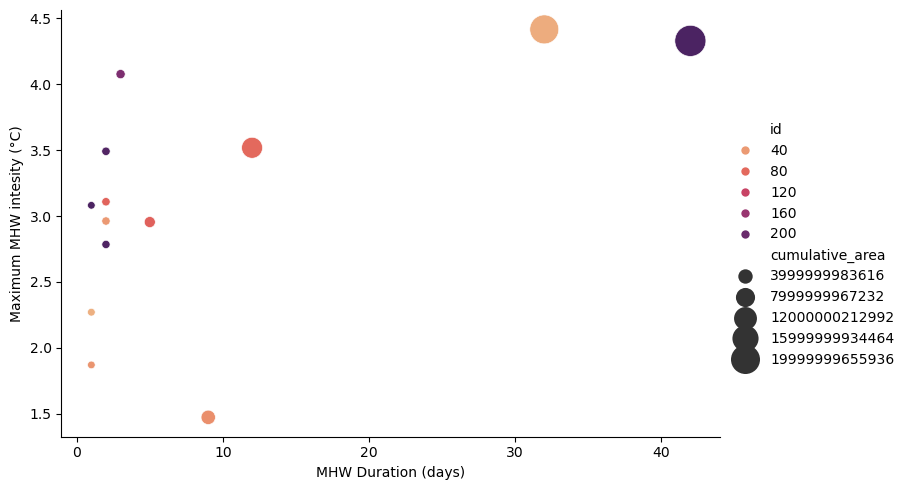

In [47]:
ax = sns.relplot(
    data=region_1, x="duration", y="max_intensity_max",
    size="cumulative_area",hue="id", sizes=(30,500),height=5,aspect=1.5,
    palette='flare'
).set(xlabel='MHW Duration (days)', ylabel='Maximum MHW intesity (°C)')

#Chicago, Charcoal, Impact, Western, Humor Sans, xkcd, fantasy

plt.show()

Text(0.5, 1.0, 'Duration (region_1)')

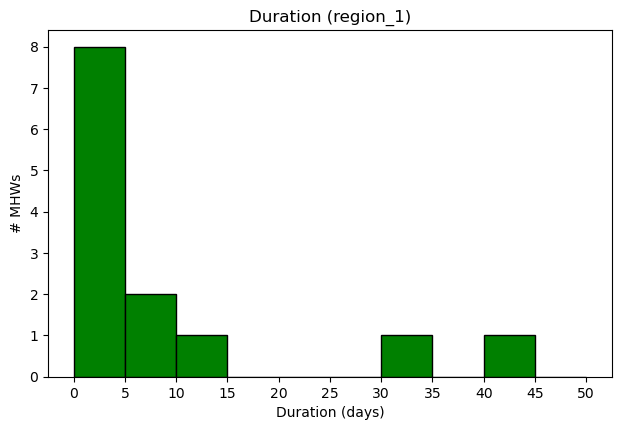

In [49]:
plt.figure(figsize=(16, 4.5))
plt.subplot(1,2,1)
#mansoname= 'MANSO'
n_bin_max = np.max(region_1.duration)+10
n_bins = np.arange(0, n_bin_max, 5) #dtype=int
region_1.duration.hist(color = "g", ec="k",lw=1, bins=n_bins)
plt.grid(visible=None)
plt.xticks(n_bins)
plt.ylabel('# MHWs')
plt.xlabel('Duration (days)')
plt.title(f'Duration (region_1)')

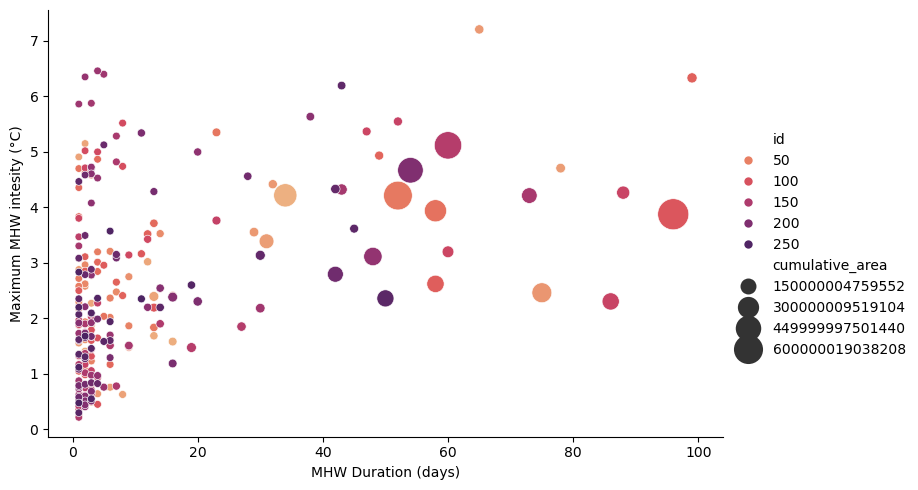

In [13]:
g = sns.relplot(
    data=globe, x="duration", y="max_intensity_max",
    size="cumulative_area",hue="id", sizes=(30,500),height=5,aspect=1.5,
    palette='flare'
).set(xlabel='MHW Duration (days)', ylabel='Maximum MHW intesity (°C)')

#Chicago, Charcoal, Impact, Western, Humor Sans, xkcd, fantasy

plt.show()

In [8]:
np.max(manso.duration)

88

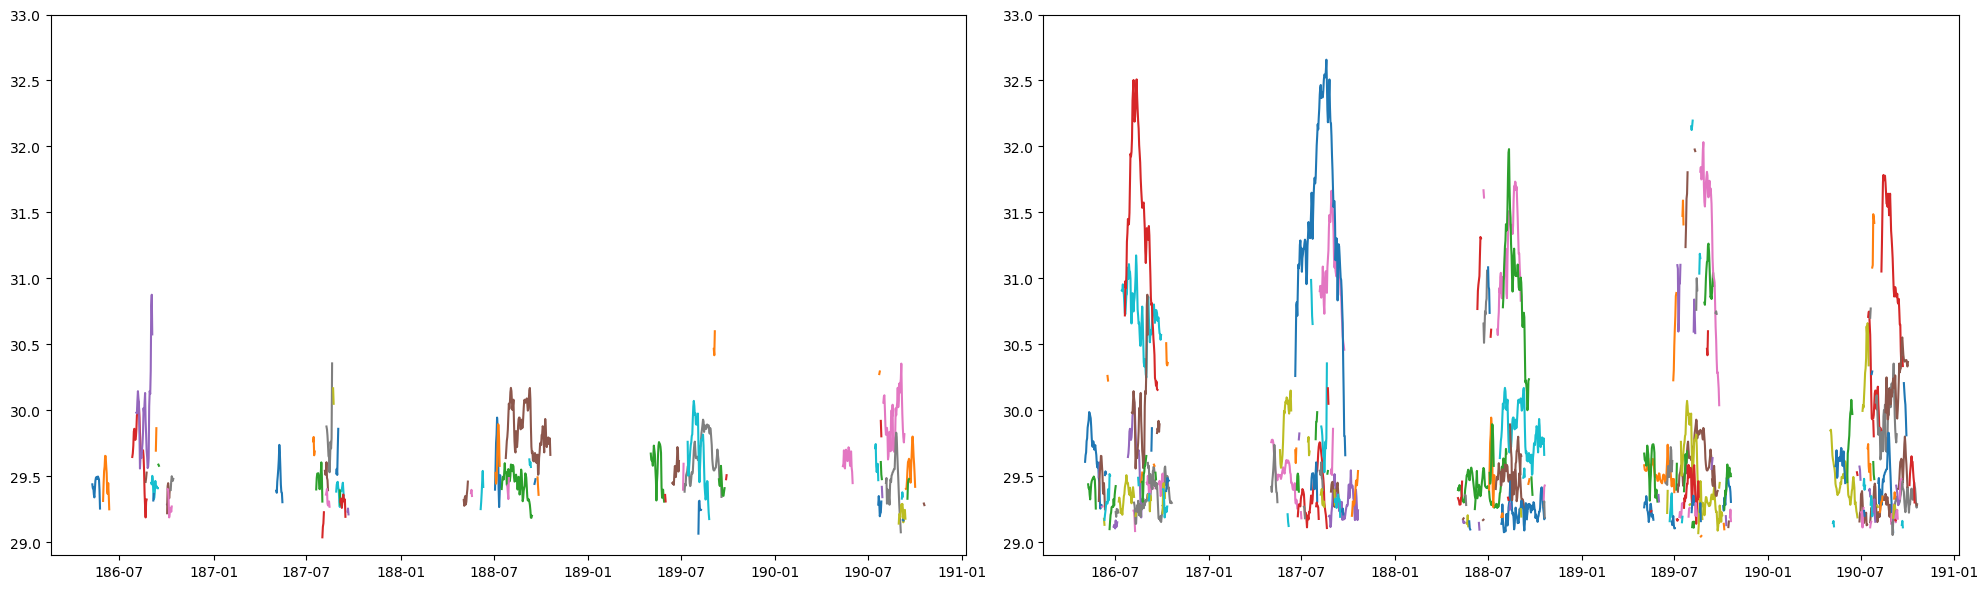

In [5]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
for i in range(len(manso['intensity_mean'].values)):
    plt.plot(manso.date[i], manso.intensity_mean[i])
    plt.ylim(28.9,33)

plt.subplot(1,2,2)
for i in range(len(globe['intensity_mean'].values)):
    plt.plot(globe.date[i], globe.intensity_mean[i])
    plt.ylim(28.9,33)

plt.tight_layout()
plt.show()

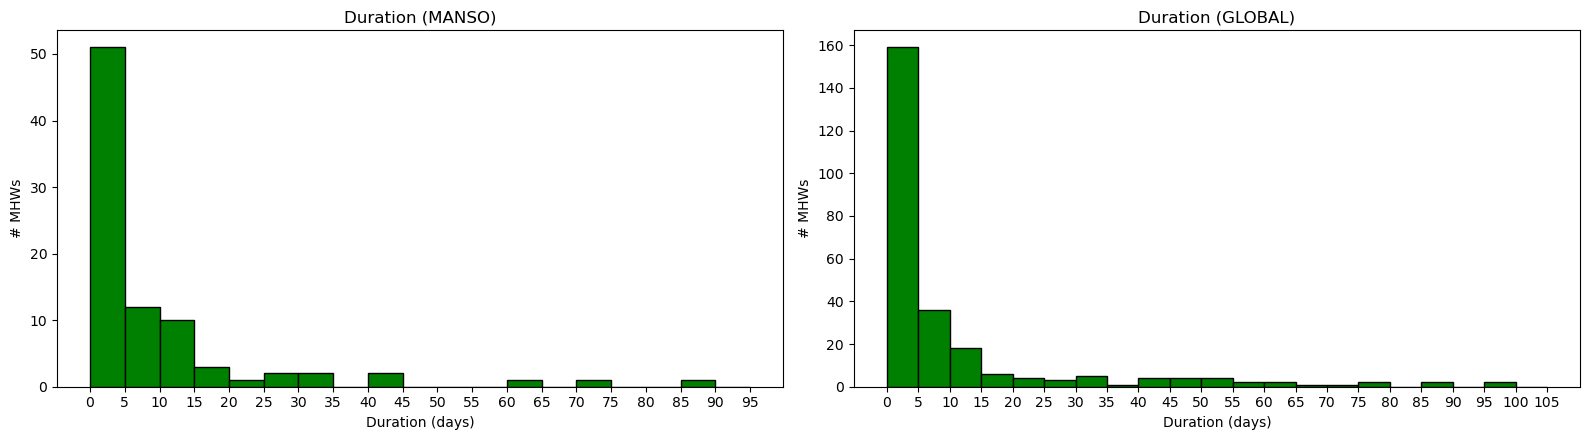

In [6]:
plt.figure(figsize=(16, 4.5))
plt.subplot(1,2,1)
mansoname= 'MANSO'
n_bin_max = np.max(manso.duration)+10
n_bins = np.arange(0, n_bin_max, 5) #dtype=int
manso.duration.hist(color = "g", ec="k",lw=1, bins=n_bins)
plt.grid(visible=None)
plt.xticks(n_bins)
plt.ylabel('# MHWs')
plt.xlabel('Duration (days)')
plt.title(f'Duration ({mansoname})')


plt.subplot(1,2,2)
globename= 'GLOBAL'
n_bin_max = np.max(globe.duration)+10
n_bins = np.arange(0, n_bin_max, 5) #dtype=int
globe.duration.hist(color = "g", ec="k",lw=1, bins=n_bins)
plt.grid(visible=None)
plt.xticks(n_bins)
plt.ylabel('# MHWs')
plt.xlabel('Duration (days)')
plt.title(f'Duration ({globename})')


plt.tight_layout()
plt.show()

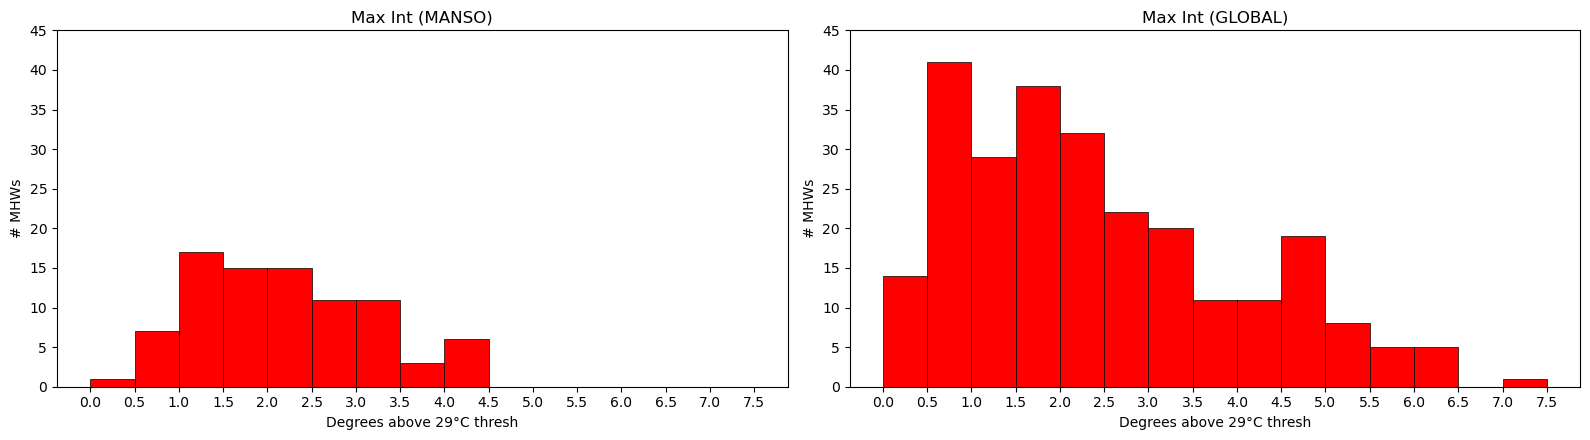

In [7]:
max_intensity_global = []
for i in range(len(globe['intensity_max'].values)):
    max_intensity_global += [np.max(globe['intensity_max'].values[i]) - 29]
max_bin_int_g = math.ceil(np.max(max_intensity_global))

max_intensity_manso = []
for i in range(len(manso['intensity_max'].values)):
    max_intensity_manso += [np.max(manso['intensity_max'].values[i]) - 29]

plt.figure(figsize=(16, 4.5))
plt.subplot(1,2,1)
bins_int=np.arange(0, max_bin_int_g, 0.5)
plt.hist(max_intensity_manso, color = "red", ec="k",lw=.5, bins=bins_int)
plt.xticks(bins_int)
plt.yticks(np.arange(0,50,5))
plt.title(f'Max Int ({mansoname})')
plt.ylabel('# MHWs')
plt.xlabel('Degrees above 29°C thresh')


plt.subplot(1,2,2)
plt.hist(max_intensity_global, color = "red", ec="k",lw=.5, bins=bins_int)
plt.xticks(bins_int)
plt.yticks(np.arange(0,50,5))
plt.title(f'Max Int ({globename})')
plt.ylabel('# MHWs')
plt.xlabel('Degrees above 29°C thresh')


plt.tight_layout()
plt.show()

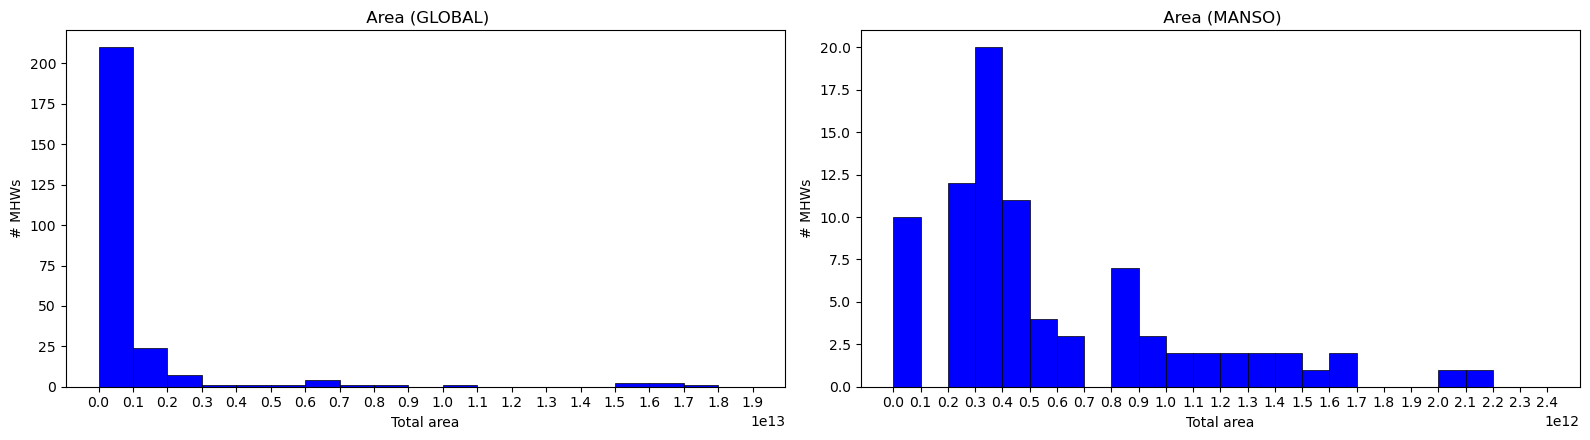

In [8]:
areaplot_global = []
for i in range(len(globe['intensity_max'].values)):
    areaplot_global += [np.max(globe['area'].values[i])]
bins_area_globe= np.arange(0,2e13,1e12)

areaplot_manso = []
for i in range(len(manso['intensity_max'].values)):
    areaplot_manso += [np.max(manso['area'].values[i])]
bins_area_manso= np.arange(0,2.5e12,1e11)

plt.figure(figsize=(16, 4.5))
plt.subplot(1,2,1)
plt.hist(areaplot_global, color = "blue", ec="k",lw=.5,bins=bins_area_globe)
plt.xticks(bins_area_globe)
plt.title(f' Area ({globename})')
plt.ylabel('# MHWs')
plt.xlabel('Total area')

plt.subplot(1,2,2)
plt.hist(areaplot_manso, color = "blue", ec="k",lw=.5, bins=bins_area_manso)
plt.xticks(bins_area_manso)
plt.title(f' Area ({mansoname})')
plt.ylabel('# MHWs')
plt.xlabel('Total area')


plt.tight_layout()
plt.show()

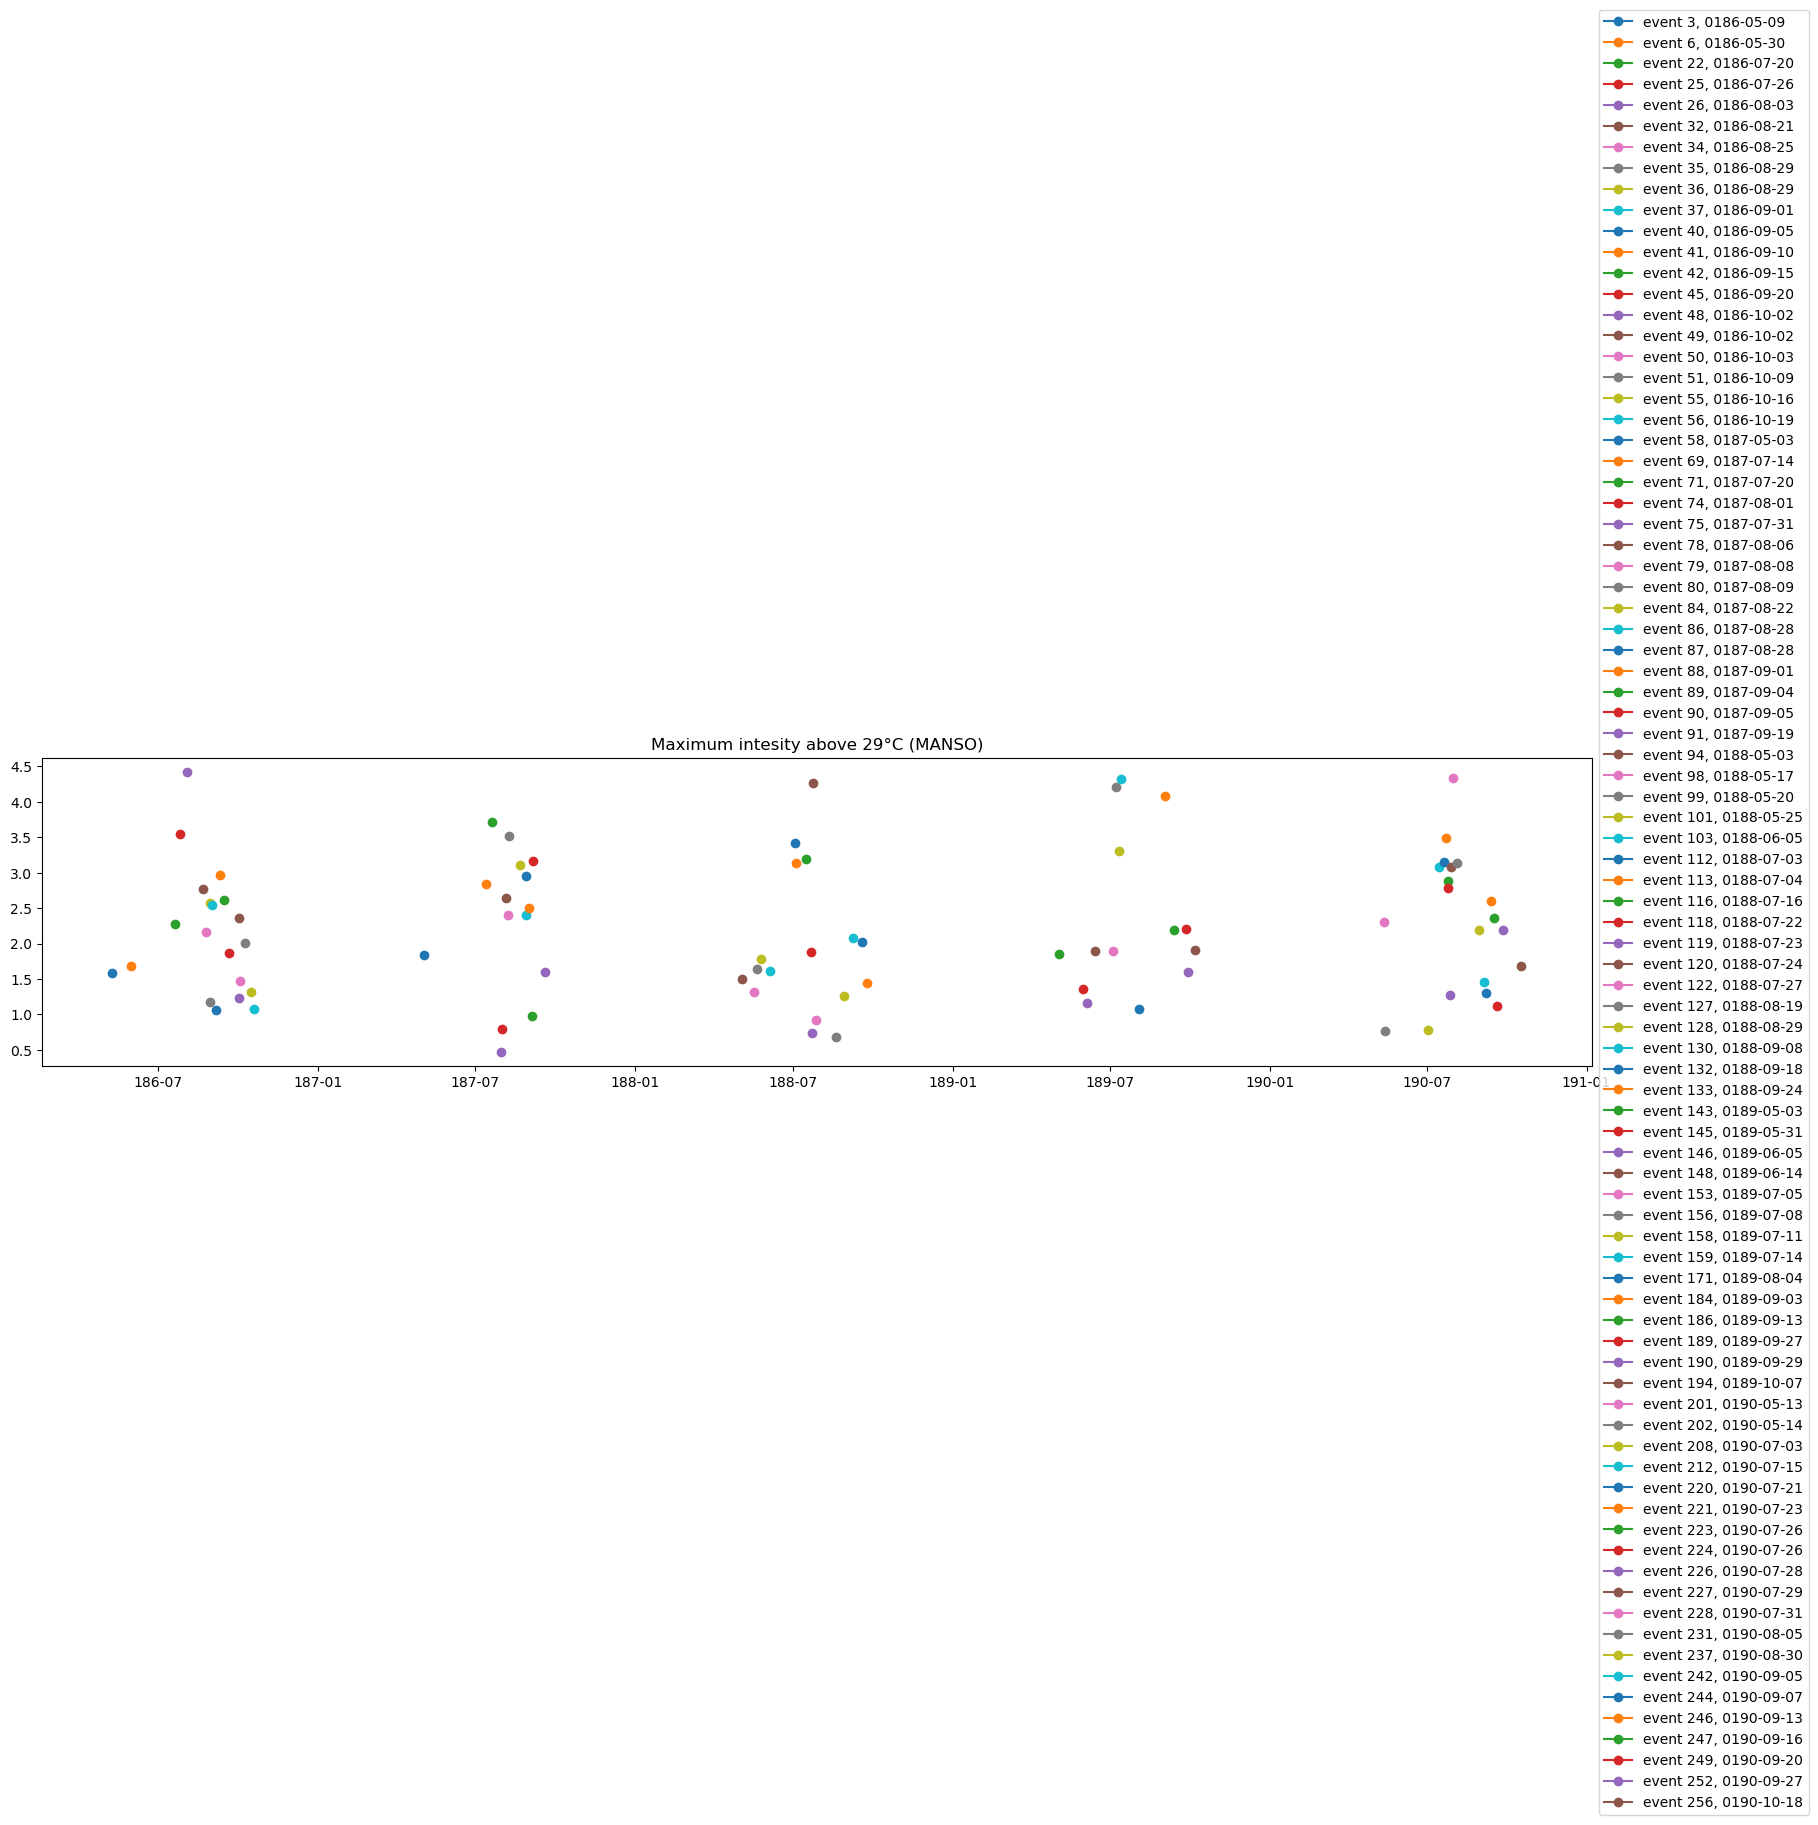

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 4))

# Generate a colormap based on the number of data points
cmap = plt.get_cmap('tab20b')
colors = cmap(np.linspace(0, 1, len(manso['intensity_mean'].values)))

# Plot each point with a different color from the colormap
for i in range(len(manso['intensity_mean'].values)):
    plt.plot(manso.date[i][0], max_intensity_manso[i], marker='o', label=f'event {manso.id[i]}, {manso.date[i][0]}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f'Maximum intesity above 29°C ({mansoname})')
plt.show()


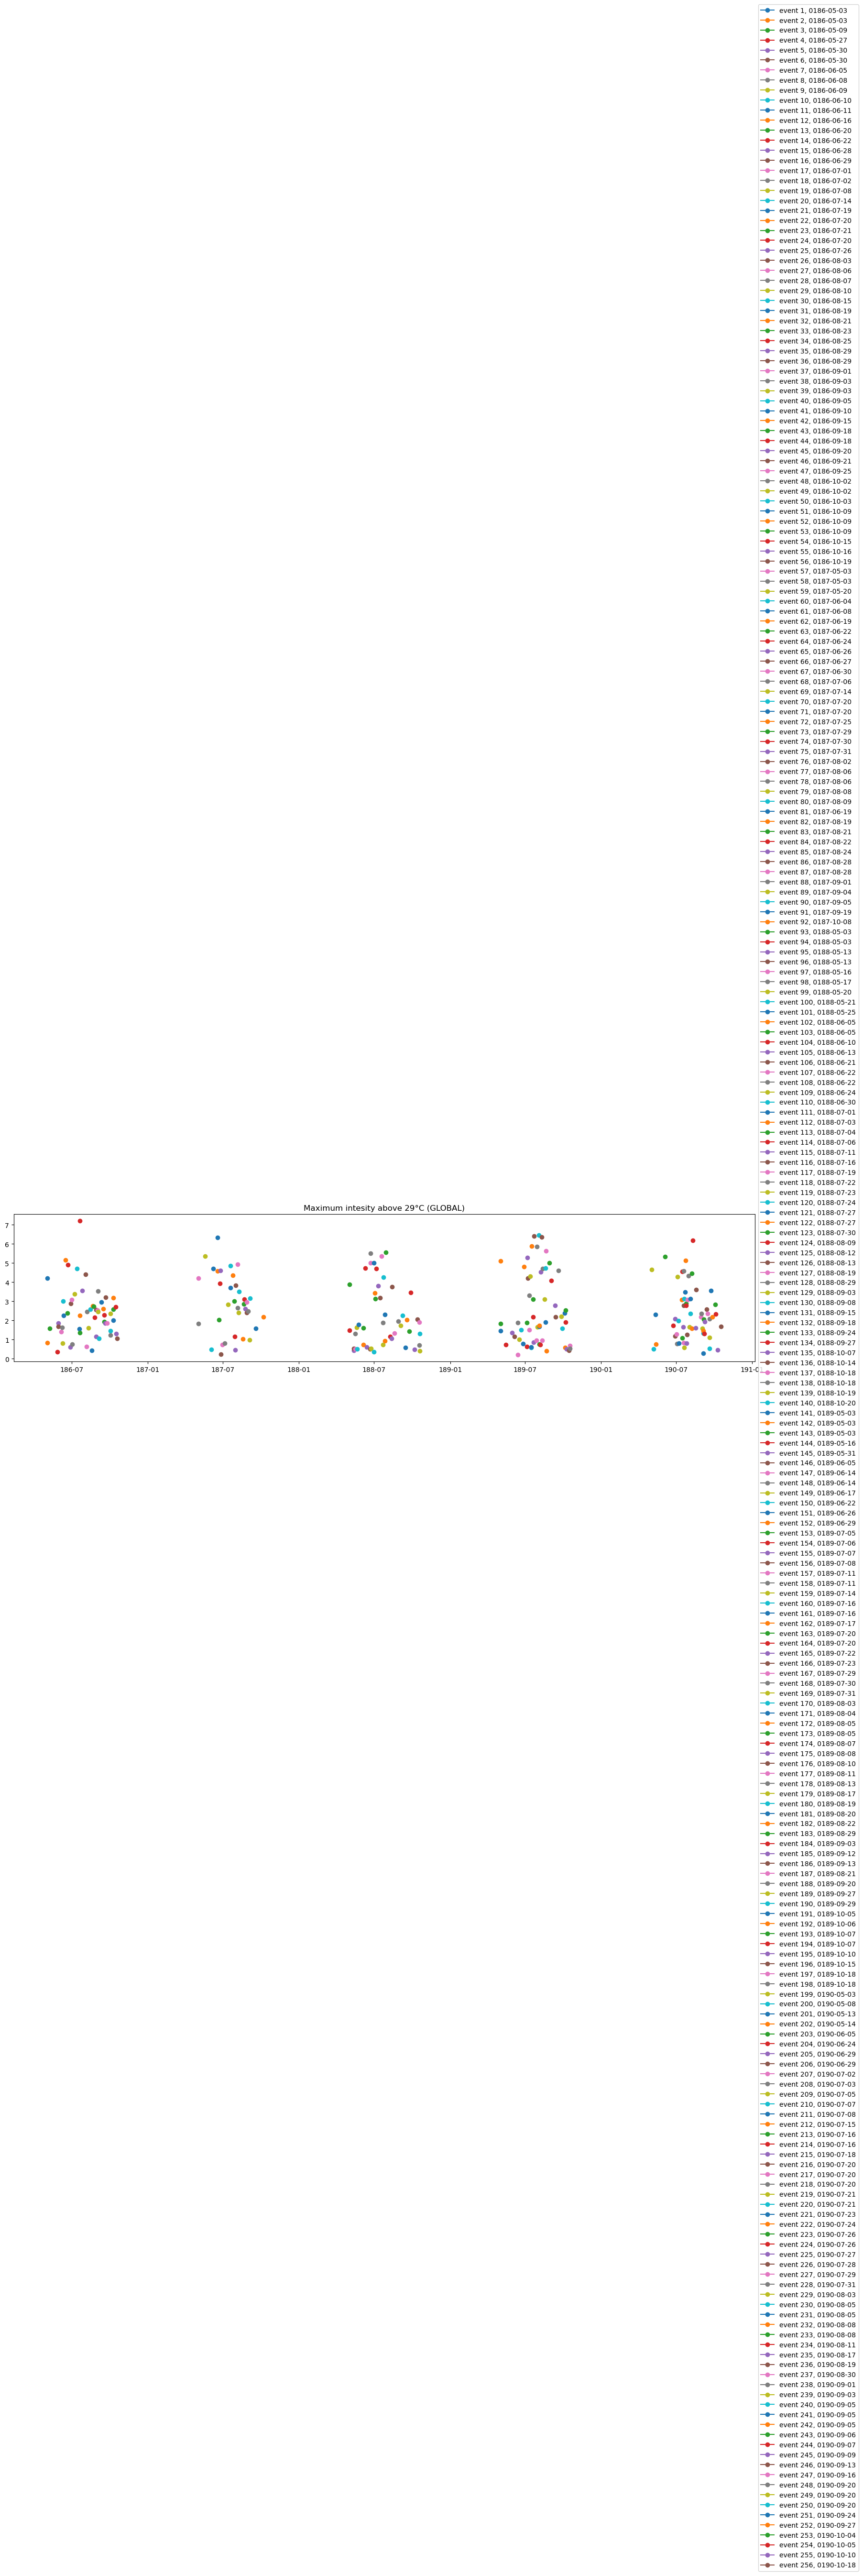

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 4))

# Generate a colormap based on the number of data points
cmap = plt.get_cmap('tab20b')
colors = cmap(np.linspace(0, 1, len(globe['intensity_mean'].values)))

# Plot each point with a different color from the colormap
for i in range(len(globe['intensity_mean'].values)):
    plt.plot(globe.date[i][0], max_intensity_global[i], marker='o', label=f'event {globe.id[i]}, {globe.date[i][0]}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f'Maximum intesity above 29°C ({globename})')
plt.show()


In [11]:
areaplot_region_sum = []
for i in range(len(manso['area'].values)):
    areaplot_region_sum += [(manso['area'].values[i]).sum()]

In [21]:
areaplot_region_sum

[13571801000000.0,
 8715813000000.0,
 285375530000.0,
 24898102000000.0,
 19867908000000.0,
 1135722200000.0,
 276291400000.0,
 305271400000.0,
 308511670000.0,
 8908265000000.0,
 689885500000.0,
 520090350000.0,
 735946200000.0,
 252364650000.0,
 1333966900000.0,
 3514375600000.0,
 3967935300000.0,
 1978885200000.0,
 430360330000.0,
 313205500000.0,
 9394512000000.0,
 1364176100000.0,
 9781051000000.0,
 202857050000.0,
 435007650000.0,
 3474925600000.0,
 3602473000000.0,
 9802119000000.0,
 545741400000.0,
 8726194400000.0,
 1842329800000.0,
 378337400000.0,
 813065960000.0,
 5968641000000.0,
 1283334600000.0,
 8114321500000.0,
 529278700000.0,
 184143450000.0,
 106870840000.0,
 3449347400000.0,
 6224549500000.0,
 3619839000000.0,
 60915420000000.0,
 471086140000.0,
 44662500000.0,
 88090064000000.0,
 238339330000.0,
 45390692000.0,
 59752600000.0,
 315535460000.0,
 815202600000.0,
 1141077000000.0,
 22513277000000.0,
 827552040000.0,
 467584880000.0,
 9149448000000.0,
 674825400000.0,

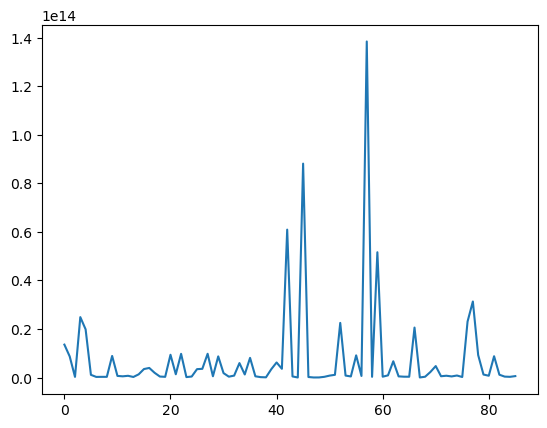

In [12]:
plt.plot(areaplot_region_sum)